In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import os

In [2]:
stats = pd.read_csv('u.info', header=None)           # u.info  is data set contain users , items , ratings
print(stats)

                0
0       943 users
1      1682 items
2  100000 ratings


In [3]:
column1=['user id','movie id','rating','timestamp']
dataset=pd.read_csv("u.data",sep="\t",header=None,names=column1)
dataset

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
d = 'movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
column_names2

['movie id',
 'movie title',
 'release date',
 'video release date',
 'IMDb URL',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [5]:
items_dataset = pd.read_csv('u.item', sep='|',header=None,encoding='latin-1',names=column_names2)

items_dataset

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
movie_dataset = items_dataset[['movie id','movie title']]
movie_dataset


,movie id,movie title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [7]:
## length of original items_dataset and length of unique combination of rows in items_dataset after removing movie id column

len(items_dataset.groupby(by=column_names2[1:])),len(items_dataset)

(1664, 1682)

In [8]:
merged_dataset = pd.merge(dataset, movie_dataset, how='inner', on='movie id')
merged_dataset

,user id,movie id,rating,timestamp,movie title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)
...,...,...,...,...,...
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [9]:
merged_dataset[(merged_dataset['movie title'] == 'Chasing Amy (1997)') & (merged_dataset['user id'] == 894)]


,user id,movie id,rating,timestamp,movie title
4800,894,246,4,882404137,Chasing Amy (1997)
22340,894,268,3,879896041,Chasing Amy (1997)


In [10]:
refined_dataset = merged_dataset.groupby(by=['user id','movie title'], as_index=False).agg({"rating":"mean"})
refined_dataset

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0
99689,943,Wolf (1994),2.0
99690,943,Wyatt Earp (1994),1.0
99691,943,Young Guns (1988),4.0


# Exploratory data analysis


In [11]:
#Plot the counts of each rating

#we first need to get the counts of each rating from ratings data

num_users = len(refined_dataset['user id'].value_counts())
num_items = len(refined_dataset['movie title'].value_counts())
num_movieid = len(merged_dataset['movie id'].value_counts())
print("Unique number of users in the dataset:",num_users)
print("Unique number of movies in the dataset:",num_items)
print("Unique number of movies ids in the dataset:",num_movieid)

Unique number of users in the dataset: 943
Unique number of movies in the dataset: 1664
Unique number of movies ids in the dataset: 1682


In [12]:

rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


This function is used to reset the index of a dataframe. By default, when you perform certain operations in pandas (like grouping or aggregating), the resulting dataframe might have a multi-level index

In [13]:
rating_count_df_reset = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df_reset

,rating,count
0,1.0,6083
1,1.5,3
2,2.0,11334
3,2.5,6
4,3.0,27060
5,3.5,19
6,4.0,34042
7,4.5,16
8,5.0,21130


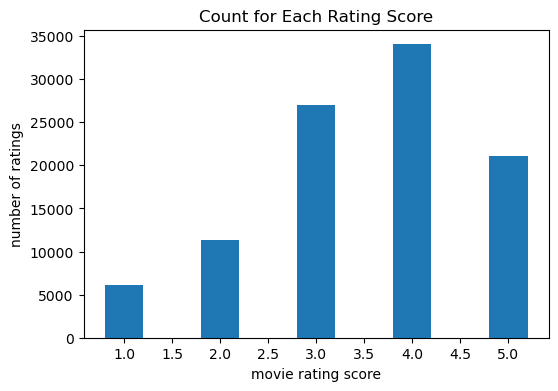

In [14]:
plt.figure(figsize=(6, 4))  # Create a new figure

plt.bar(rating_count_df_reset["rating"],rating_count_df_reset['count'],width=0.4)
plt.title('Count for Each Rating Score', fontsize=12)
plt.xlabel('movie rating score')
plt.ylabel('number of ratings')

plt.xticks(rating_count_df_reset["rating"])

#By using plt.xticks(rating_count_df["rating"]), you are explicitly setting the tick locations to the exact decimal rating values in your data, 
#ensuring that all the decimal values are displayed correctly on the x-axis of the graph.
plt.show()


In [15]:
#Ratings for the movies not seen by a user is by default considered as 0. 
#Lets calculate and add it to the existing dataframe.

total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

1469459

In [16]:
# append counts of zero rating to df_ratings_cnt
rating_count_df = rating_count_df.append(pd.DataFrame({'count': zero_count}, index=[0.0]),verify_integrity=True,).sort_index()
rating_count_df


C:\Users\asus\AppData\Local\Temp\ipykernel_23204\3256573534.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_count_df = rating_count_df.append(pd.DataFrame({'count': zero_count}, index=[0.0]),verify_integrity=True,).sort_index()


,count
0.0,1469459
1.0,6083
1.5,3
2.0,11334
2.5,6
3.0,27060
3.5,19
4.0,34042
4.5,16
5.0,21130


In [17]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,count
0,0.0,1469459
1,1.0,6083
2,1.5,3
3,2.0,11334
4,2.5,6
5,3.0,27060
6,3.5,19
7,4.0,34042
8,4.5,16
9,5.0,21130


In [18]:
#let's take log transform for count values and then we can plot them to compare


# add log count
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,rating score,count,log_count
0,0.0,1469459,14.200405
1,1.0,6083,8.713253
2,1.5,3,1.098612
3,2.0,11334,9.335562
4,2.5,6,1.791759
5,3.0,27060,10.205812
6,3.5,19,2.944439
7,4.0,34042,10.435350
8,4.5,16,2.772589
9,5.0,21130,9.958449


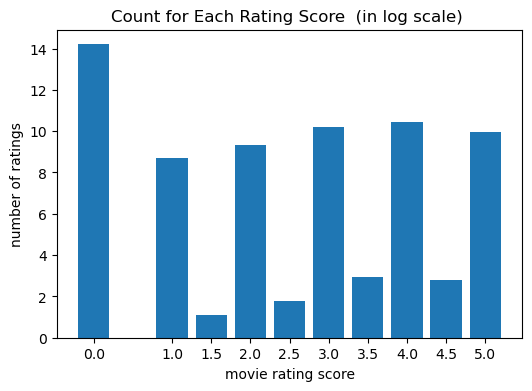

In [19]:
plt.figure(figsize=(6, 4))  # Create a new figure

plt.bar(rating_count_df["rating score"],rating_count_df["log_count"],width=0.4)
plt.title('Count for Each Rating Score  (in log scale) ', fontsize=12)
plt.xlabel('movie rating score')
plt.ylabel('number of ratings')

plt.xticks(rating_count_df["rating score"])

plt.show()

In [20]:
refined_dataset

,user id,movie title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0
...,...,...,...
99688,943,"Wizard of Oz, The (1939)",3.0
99689,943,Wolf (1994),2.0
99690,943,Wyatt Earp (1994),1.0
99691,943,Young Guns (1988),4.0


In [21]:
# get rating frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('movie title').size(), columns=['rating count'])
movies_count_df 

,rating count
movie title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [22]:
movies_count_df=pd.merge(movies_count_df,items_dataset,how="inner",on="movie title")
new_movies_count=movies_count_df.iloc[:,1:3]
new_movies_count

,rating count,movie id
0,9,1300
1,5,1353
2,109,225
3,125,178
4,41,330
...,...,...
1677,44,1188
1678,41,547
1679,6,1164
1680,9,267


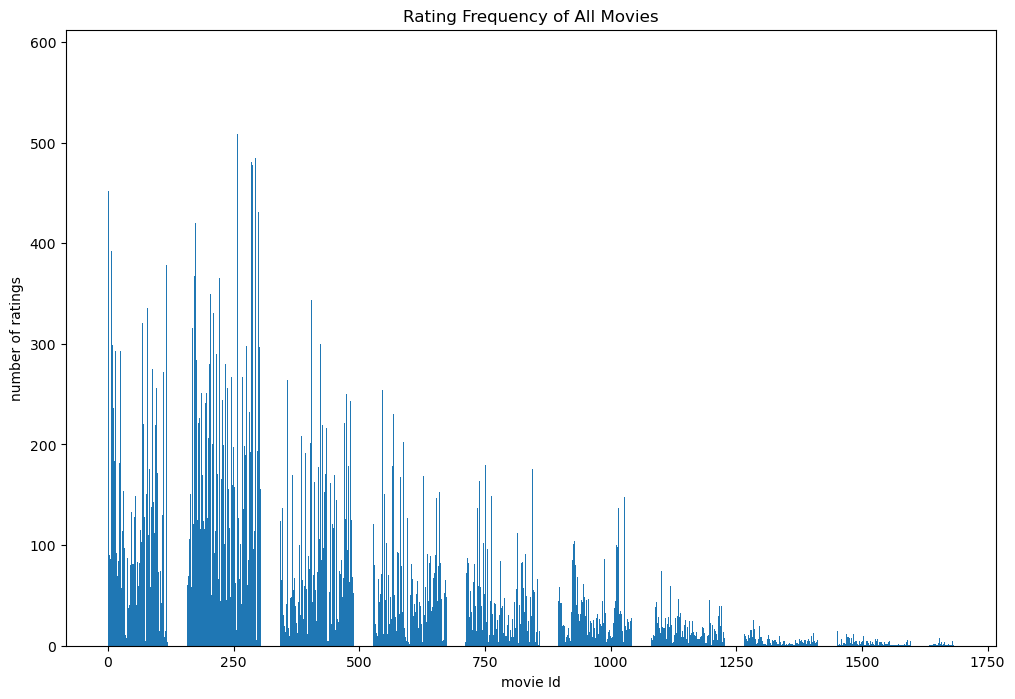

In [23]:
movies_count_df = pd.DataFrame( movies_count_df)

plt.figure(figsize=(12, 8))  # Create a new figure

ax = plt.bar(movies_count_df["movie id"], movies_count_df['rating count'])

plt.title('Rating Frequency of All Movies', fontsize=12)
plt.xlabel('movie Id')
plt.ylabel('number of ratings')

plt.show() 

# Training KNN model to build item-based collaborative Recommender System.


We need to reshape the data in such a way that each row of the dataframe represents a movie and each column represents a different user. 
So we want the data to be [movies, users] array if movie is the subject where similar movies must be found and [users, movies] array for reverse.

To reshape the dataframe, we will pivot the dataframe to the wide format with movies as rows and users as columns. As we know that not all users watch all the movies,

*we can expect a lot of missing values*. We will have to fill those missing observations with 0s since we are going to perform linear algebra operations (calculating distances between vectors).

Finally, we transform the values of the dataframe into a scipy sparse matrix for most efficient calculations.

This dataframe is then fed into a KNN model.

In [24]:
# pivot and create movie-user matrix

# it is rating given by users to movies - if not watched and given filled by NAN =0 


user_to_movie_df = refined_dataset.pivot(index='user id',columns='movie title',values='rating').fillna(0)

user_to_movie_df

movie title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# transform matrix to scipy sparse matrix
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df


<943x1664 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

# Fitting K-Nearest Neighbours model to the scipy sparse matrix:

In [26]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)
     


NearestNeighbors(algorithm='brute', metric='cosine')

# function to find top n similar users of the given input user 

In [27]:
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.

  knn_input = np.asarray([user_to_movie_df.values[user-1]])
  
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
#   print("Top",n,"users who are very much similar to the User-",user, "are: ")
#   print(" ")
#   for i in range(1,len(distances[0])):
#     print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]


In [28]:
from pprint import pprint
user_id = 778
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)
print(similar_user_list, distance_list)

 Few of movies seen by the User:
['Amityville Horror, The (1979)',
 'Angels in the Outfield (1994)',
 'Apocalypse Now (1979)',
 'Apollo 13 (1995)',
 'Austin Powers: International Man of Mystery (1997)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Blues Brothers, The (1980)',
 'Chasing Amy (1997)',
 'Clerks (1994)']
[124 933  56 738 653] [0.45866494 0.55819599 0.58584131 0.59162725 0.59914798]


# recomendation portion 

1==>  One way would be by taking the average of the existing ratings given by the similar users and picking the top 10 or 15           movies to recommend to our current user.

(But recommendation would be more effective if we define weights to ratings by each similar user based on the thier distance from the input user.)

2==>  Defining these weights would give us the accurate recommendations by eliminating the chance of decision manipulation by         the users who are relatively very far from the input user.


In [29]:
similar_user_list, distance_list

(array([124, 933,  56, 738, 653], dtype=int64),
 array([0.45866494, 0.55819599, 0.58584131, 0.59162725, 0.59914798]))

In [30]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.16419139, 0.19982119, 0.20971757, 0.2117888 , 0.21448105])

In [31]:
#    Getting ratings of all movies by derived similar users

mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
mov_rtngs_sim_users

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
movies_list = user_to_movie_df.columns
movies_list

Index([''Til There Was You (1997)', '1-900 (1994)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)', '187 (1997)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '3 Ninjas: High Noon At Mega Mountain (1998)', '39 Steps, The (1935)',
       ...
       'Yankee Zulu (1994)', 'Year of the Horse (1997)', 'You So Crazy (1994)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Poisoner's Handbook, The (1995)',
       'Zeus and Roxanne (1997)', 'unknown',
       'Á köldum klaka (Cold Fever) (1994)'],
      dtype='object', name='movie title', length=1664)

In [33]:
print("Weightage list shape:", len(weightage_list))
print("mov_rtngs_sim_users shape:", mov_rtngs_sim_users.shape)
print("Number of movies:", len(movies_list))

Weightage list shape: 5
mov_rtngs_sim_users shape: (5, 1664)
Number of movies: 1664


In [34]:
weightage_list

array([0.16419139, 0.19982119, 0.20971757, 0.2117888 , 0.21448105])

In [35]:
#   Broadcasting weightage matrix to similar user rating matrix. so that it gets compatible for matrix operations


weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
weightage_list.shape

(5, 1664)

In [36]:
weightage_list

array([[0.16419139, 0.16419139, 0.16419139, ..., 0.16419139, 0.16419139,
        0.16419139],
       [0.19982119, 0.19982119, 0.19982119, ..., 0.19982119, 0.19982119,
        0.19982119],
       [0.20971757, 0.20971757, 0.20971757, ..., 0.20971757, 0.20971757,
        0.20971757],
       [0.2117888 , 0.2117888 , 0.2117888 , ..., 0.2117888 , 0.2117888 ,
        0.2117888 ],
       [0.21448105, 0.21448105, 0.21448105, ..., 0.21448105, 0.21448105,
        0.21448105]])

In [37]:
new_rating_matrix = weightage_list*mov_rtngs_sim_users
mean_rating_list = new_rating_matrix.sum(axis =0)
mean_rating_list

array([0.        , 0.        , 1.02879509, ..., 0.        , 0.        ,
       0.        ])

In [38]:
from pprint import pprint
def recommend_movies(n):
  n = min(len(mean_rating_list),n)
  pprint(list(movies_list[np.argsort(mean_rating_list)[::-1][:n]]))

In [39]:
print("Movies recommended based on similar users are: ")
recommend_movies(10)

Movies recommended based on similar users are: 
['Star Wars (1977)',
 'Terminator, The (1984)',
 "Schindler's List (1993)",
 'Fugitive, The (1993)',
 'Forrest Gump (1994)',
 'Princess Bride, The (1987)',
 'Empire Strikes Back, The (1980)',
 'Pulp Fiction (1994)',
 'Die Hard (1988)',
 'Monty Python and the Holy Grail (1974)']


# Drawbacks



1. This recommendation system has a drawback, it also recommends movies which are already seen by the given input User.

2. And also there is a possibility of recommending the movies which are not at all seen by any of the similar users.

Above drawbacks are addressed and a new recommender system with modification is built

Below function is defined to remove the movies which are already seen the current user and not at all seen by any of the similar users.

In [40]:
def filtered_movie_recommendations(n):
  
  first_zero_index = np.where(mean_rating_list == 0)[0][-1]
  sortd_index = np.argsort(mean_rating_list)[::-1]
  sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
  n = min(len(sortd_index),n)
  movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
  filtered_movie_list = list(movies_list[sortd_index])
  count = 0
  final_movie_list = []
  for i in filtered_movie_list:
    if i not in movies_watched:
      count+=1
      final_movie_list.append(i)
    if count == n:
      break
  if count == 0:
    print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
  else:
    pprint(final_movie_list)


In [41]:
filtered_movie_recommendations(10)

['Star Wars (1977)',
 "Schindler's List (1993)",
 'Princess Bride, The (1987)',
 'Empire Strikes Back, The (1980)',
 'Return of the Jedi (1983)',
 'Fargo (1996)',
 'Dances with Wolves (1990)',
 'Toy Story (1995)',
 'Braveheart (1995)',
 'Star Trek: First Contact (1996)']


# Function for recommendation system

In [42]:
import numpy as np
from pprint import pprint


from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): 
  
  if(user_id not in refined_dataset['user id'].values):
        print("Given user id is not valid")
        
  if(n_similar_users<1 ):
    print("Select at least 1 similar user to find on")
    
  
  print("Movie seen by the User:")
  pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
  print("")

  def get_similar_users(user, n = 5):
    
    knn_input = np.asarray([user_to_movie_df.values[user-1]])
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
    print("Top",n,"users who are very much similar to the User-",user, "are: ")
    print(" ")

    for i in range(1,len(distances[0])):
      print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
    print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n = 10):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
      print("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      pprint(final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
  movies_list = user_to_movie_df.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
  print("")
  print("Movies recommended based on similar users are: ")
  print("")
  filtered_movie_recommendations(n_movies)

In [44]:
print("Hello welcome to recommend point [1-943]  ---Enter user id")
user_id= int(input())
print("number of similar users to be considered")
sim_users = int(input())
print("Enter number of movies to be recommended:")
n_movies = int(input())
recommender_system(user_id,sim_users,n_movies)
# recommender_system(300, 15,15)

Hello welcome to recommend point [1-943]  ---Enter user id
554
number of similar users to be considered
55
Enter number of movies to be recommended:
5
Movie seen by the User:
['Ace Ventura: Pet Detective (1994)',
 'Aladdin (1992)',
 'Amadeus (1984)',
 'American President, The (1995)',
 'Apollo 13 (1995)',
 'Babe (1995)',
 'Back to the Future (1985)',
 'Before and After (1996)',
 'Ben-Hur (1959)',
 'Braveheart (1995)',
 'Broken Arrow (1996)',
 'Cape Fear (1991)',
 'City Hall (1996)',
 'Cliffhanger (1993)',
 'Clockwork Orange, A (1971)',
 'Conspiracy Theory (1997)',
 'Crimson Tide (1995)',
 'Crow, The (1994)',
 'Dave (1993)',
 'Dead Man Walking (1995)',
 'Devil in a Blue Dress (1995)',
 "Devil's Own, The (1997)",
 'Disclosure (1994)',
 'E.T. the Extra-Terrestrial (1982)',
 'Eddie (1996)',
 'Empire Strikes Back, The (1980)',
 'English Patient, The (1996)',
 'Eraser (1996)',
 'Evita (1996)',
 'Fan, The (1996)',
 'Fantasia (1940)',
 'Fargo (1996)',
 'Father of the Bride Part II (1995)',
 'F

# GUI  for recommendation system   (using Tkinter) 

In [45]:
import tkinter as tk
from tkinter import Label, Entry, Button, scrolledtext, END, messagebox
import numpy as np
from pprint import pprint


from pprint import pprint

def recommender_system(user_id, n_similar_users, n_movies): 
  
  if(user_id not in refined_dataset['user id'].values):
        return (["Given user id is not valid"])
        
  if(n_similar_users<1 ):
    return (["Select at least 1 similar user to find on"])
    
  
#   print("Movie seen by the User:")
#   pprint(list(refined_dataset[refined_dataset['user id'] == user_id]['movie title']))
#   print("")

  def get_similar_users(user, n = 5):
    
    knn_input = np.asarray([user_to_movie_df.values[user-1]])
    
    distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
    
#     print("Top",n,"users who are very much similar to the User-",user, "are: ")
#     print(" ")

#     for i in range(1,len(distances[0])):
#       print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
#     print("")
    return indices.flatten()[1:] + 1, distances.flatten()[1:]


  def filtered_movie_recommendations(n = 10):
  
    first_zero_index = np.where(mean_rating_list == 0)[0][-1]
    sortd_index = np.argsort(mean_rating_list)[::-1]
    sortd_index = sortd_index[:list(sortd_index).index(first_zero_index)]
    n = min(len(sortd_index),n)
    movies_watched = list(refined_dataset[refined_dataset['user id'] == user_id]['movie title'])
    filtered_movie_list = list(movies_list[sortd_index])
    count = 0
    final_movie_list = []
    for i in filtered_movie_list:
      if i not in movies_watched:
        count+=1
        final_movie_list.append(i)
      if count == n:
        break
    if count == 0:
      return ("There are no movies left which are not seen by the input users and seen by similar users. May be increasing the number of similar users who are to be considered may give a chance of suggesting an unseen good movie.")
    else:
      return (final_movie_list)

  similar_user_list, distance_list = get_similar_users(user_id,n_similar_users)
  weightage_list = distance_list/np.sum(distance_list)
  mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
  movies_list = user_to_movie_df.columns
  weightage_list = weightage_list[:,np.newaxis] + np.zeros(len(movies_list))
  new_rating_matrix = weightage_list*mov_rtngs_sim_users
  mean_rating_list = new_rating_matrix.sum(axis =0)
#   print("")
#   print("Movies recommended based on similar users are: ")
#   print("")
  recommended_movies=filtered_movie_recommendations(n_movies)
  if isinstance(recommended_movies, str):
    return [recommended_movies]  # Convert the string to a list with a single element
  else:
    return recommended_movies
     


# Function to recommend movies and display the results
def recommend_movies():
    user_id = int(user_id_entry.get())
    n_similar_users = int(similar_users_entry.get())
    n_movies = int(movies_to_recommend_entry.get())
    
    try:
        # Call your recommendation system function with the inputs
        recommended_movies = recommender_system(user_id, n_similar_users, n_movies)
        
        if recommended_movies is None or len(recommended_movies) == 0:
            messagebox.showinfo("Info", "No recommendations found.")
        else:
            # Clear previous content in the result_text widget
            result_text.config(state=tk.NORMAL)
            result_text.delete(1.0, END)
            
            # Display the recommended movies in the result_text widget
            result_text.insert(tk.END, "Recommended Movies: \n\n")
            for movie in recommended_movies:
                result_text.insert(tk.END, movie + "\n")
            
            # Disable editing and make the result_text read-only
            result_text.config(state=tk.DISABLED)
    except Exception as e:
        messagebox.showerror("Error", str(e))


# Create the main window
root = tk.Tk()
root.title("Movie Recommendation System")

# Create and place labels and entry widgets for user inputs
user_id_label = Label(root, text="Enter User ID:")
user_id_label.pack()

user_id_entry = Entry(root)
user_id_entry.pack()

similar_users_label = Label(root, text="Number of Similar Users:")
similar_users_label.pack()

similar_users_entry = Entry(root)
similar_users_entry.pack()

movies_to_recommend_label = Label(root, text="Number of Movies to Recommend:")
movies_to_recommend_label.pack()

movies_to_recommend_entry = Entry(root)
movies_to_recommend_entry.pack()

# Create and place the recommendation button
recommend_button = Button(root, text="Recommend Movies", command=recommend_movies)
recommend_button.pack()

# Create a scrolled text widget to display the recommended movies
result_text = scrolledtext.ScrolledText(root, width=40, height=10, state=tk.DISABLED)
result_text.pack()

# Start the Tkinter main loop
root.mainloop()


# Movie Recommendation using KNN with Input as Movie Name and Number of movies you want to get recommended:
    
 


Reshaping model in such a way that each movie has n-dimensional rating space where n is total number of users who could rate.
We will train the KNN model inorder to find the closely matching similar movies to the movie we give as input and we recommend the top movies which would more closely align to the movie we have given.


In [45]:
# pivot and create movie-user matrix
movie_to_user_df = refined_dataset.pivot(
     index='movie title',
   columns='user id',
      values='rating').fillna(0)

movie_to_user_df

user id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900 (1994),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians (1996),2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men (1957),5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
187 (1997),0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
"Young Poisoner's Handbook, The (1995)",0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zeus and Roxanne (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
# transform matrix to scipy sparse matrix
movie_to_user_sparse_df = csr_matrix(movie_to_user_df.values)
movie_to_user_sparse_df

<1664x943 sparse matrix of type '<class 'numpy.float64'>'
	with 99693 stored elements in Compressed Sparse Row format>

In [47]:
movies_list = list(movie_to_user_df.index)
movies_list[:10]

["'Til There Was You (1997)",
 '1-900 (1994)',
 '101 Dalmatians (1996)',
 '12 Angry Men (1957)',
 '187 (1997)',
 '2 Days in the Valley (1996)',
 '20,000 Leagues Under the Sea (1954)',
 '2001: A Space Odyssey (1968)',
 '3 Ninjas: High Noon At Mega Mountain (1998)',
 '39 Steps, The (1935)']

In [48]:
movie_dict = {movie : index for index, movie in enumerate(movies_list)}
print(movie_dict)

{"'Til There Was You (1997)": 0, '1-900 (1994)': 1, '101 Dalmatians (1996)': 2, '12 Angry Men (1957)': 3, '187 (1997)': 4, '2 Days in the Valley (1996)': 5, '20,000 Leagues Under the Sea (1954)': 6, '2001: A Space Odyssey (1968)': 7, '3 Ninjas: High Noon At Mega Mountain (1998)': 8, '39 Steps, The (1935)': 9, '8 1/2 (1963)': 10, '8 Heads in a Duffel Bag (1997)': 11, '8 Seconds (1994)': 12, 'A Chef in Love (1996)': 13, 'Above the Rim (1994)': 14, 'Absolute Power (1997)': 15, 'Abyss, The (1989)': 16, 'Ace Ventura: Pet Detective (1994)': 17, 'Ace Ventura: When Nature Calls (1995)': 18, 'Across the Sea of Time (1995)': 19, 'Addams Family Values (1993)': 20, 'Addicted to Love (1997)': 21, 'Addiction, The (1995)': 22, 'Adventures of Pinocchio, The (1996)': 23, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 24, 'Adventures of Robin Hood, The (1938)': 25, 'Affair to Remember, An (1957)': 26, 'African Queen, The (1951)': 27, 'Afterglow (1997)': 28, 'Age of Innocence, The (1993)': 2

In [49]:
case_insensitive_movies_list = [i.lower() for i in movies_list]
case_insensitive_movies_list 

["'til there was you (1997)",
 '1-900 (1994)',
 '101 dalmatians (1996)',
 '12 angry men (1957)',
 '187 (1997)',
 '2 days in the valley (1996)',
 '20,000 leagues under the sea (1954)',
 '2001: a space odyssey (1968)',
 '3 ninjas: high noon at mega mountain (1998)',
 '39 steps, the (1935)',
 '8 1/2 (1963)',
 '8 heads in a duffel bag (1997)',
 '8 seconds (1994)',
 'a chef in love (1996)',
 'above the rim (1994)',
 'absolute power (1997)',
 'abyss, the (1989)',
 'ace ventura: pet detective (1994)',
 'ace ventura: when nature calls (1995)',
 'across the sea of time (1995)',
 'addams family values (1993)',
 'addicted to love (1997)',
 'addiction, the (1995)',
 'adventures of pinocchio, the (1996)',
 'adventures of priscilla, queen of the desert, the (1994)',
 'adventures of robin hood, the (1938)',
 'affair to remember, an (1957)',
 'african queen, the (1951)',
 'afterglow (1997)',
 'age of innocence, the (1993)',
 'aiqing wansui (1994)',
 'air bud (1997)',
 'air force one (1997)',
 'air up 

In [50]:
knn_movie_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_movie_model.fit(movie_to_user_sparse_df)


NearestNeighbors(algorithm='brute', metric='cosine')

In [51]:
## function to find top n similar users of the given input user 
def get_similar_movies(movie, n = 10):
  ## input to this function is the movie and number of top similar movies you want.
  index = movie_dict[movie]
  knn_input = np.asarray([movie_to_user_df.values[index]])
  n = min(len(movies_list)-1,n)
  distances, indices = knn_movie_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"movies which are very much similar to the Movie-",movie, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(movies_list[indices[0][i]])
  

In [52]:
from pprint import pprint
movie_name = '101 Dalmatians (1996)'

get_similar_movies(movie_name,15)

Top 15 movies which are very much similar to the Movie- 101 Dalmatians (1996) are: 
 
Jack (1996)
Twister (1996)
Willy Wonka and the Chocolate Factory (1971)
Independence Day (ID4) (1996)
Toy Story (1995)
Father of the Bride Part II (1995)
Hunchback of Notre Dame, The (1996)
Lion King, The (1994)
Mrs. Doubtfire (1993)
Jungle Book, The (1994)
Grumpier Old Men (1995)
Mission: Impossible (1996)
Mr. Holland's Opus (1995)
Homeward Bound II: Lost in San Francisco (1996)
Dragonheart (1996)


In [53]:
# function which takes input and returns suggestions for the user

def get_possible_movies(movie):

    temp = ''
    possible_movies = case_insensitive_movies_list.copy()
    for i in movie :
      out = []
      temp += i
      for j in possible_movies:
        if temp in j:
          out.append(j)
      if len(out) == 0:
          return possible_movies
      out.sort()
      possible_movies = out.copy()

    return possible_movies

In [54]:
class invalid(Exception):
    pass

def spell_correction():
    
    try:

      movie_name = input("Enter the Movie name: ")
      movie_name_lower = movie_name.lower()
      if movie_name_lower not in case_insensitive_movies_list :
        raise invalid
      else :
        # movies_list[case_insensitive_country_names.index(movie_name_lower)]
        num_recom = int(input("Enter Number of movie recommendations needed: "))
        get_similar_movies(movies_list[case_insensitive_movies_list.index(movie_name_lower)],num_recom)

    except invalid:

      possible_movies = get_possible_movies(movie_name_lower)

      if len(possible_movies) == len(movies_list) :
        print("Movie name entered is does not exist in the list ")
      else :
        indices = [case_insensitive_movies_list.index(i) for i in possible_movies]
        print("Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :\n",[movies_list[i] for i in indices])
        print("\nPlease write your choice as shown above")
        spell_correction()


In [55]:
spell_correction()

Enter the Movie name: TITAN
Entered Movie name is not matching with any movie from the dataset . Please check the below suggestions :
 ['Titanic (1997)']

Please write your choice as shown above
Enter the Movie name: TITANIC (1997)
Enter Number of movie recommendations needed: 5
Top 5 movies which are very much similar to the Movie- Titanic (1997) are: 
 
Good Will Hunting (1997)
Contact (1997)
Apt Pupil (1998)
Tomorrow Never Dies (1997)
Air Force One (1997)


# #observation

An interesting observation would be that the above KNN model for movies recommends movies that are produced in very similar years of the input movie. 
However, the cosine distance of all those recommendations are observed to be actually quite small. This might be because there are too many zero values in our movie-user matrix. With too many zero values in our data, the data sparsity becomes a real issue for KNN model and the distance in KNN model starts to fall apart. 

In [ ]:
# calcuate total number of entries in the movie-user matrix
num_entries = movie_to_user_df.shape[0] * movie_to_user_df.shape[1]
print("total number of entries in the movie-user matrix - ",num_entries)

# calculate total number of entries with zero values
num_zeros = (movie_to_user_df==0).sum(axis=1).sum()
print("total number of entries with zero values - ",num_zeros)

# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries
print('There is about {:.2%} of ratings in our data is missing'.format(ratio_zeros))